In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import wilcoxon

ACTIVE_SHAM = 'Active'
GROUP1 = 'PRE'
GROUP2 = 'POST'
N = 0 # How many columns to drop 
LINK_DIFF = 2
ASYM_DIFF = 0
mapping = {0: 'theta', 1: 'alpha', 2: 'beta'}

In [51]:
# selected_regions['theta'] = ['LF', 'RC' 'LPO']
# selected_regions['alpha'] = ['RC', 'LF', 'LPO']
# selected_regions['beta'] = ['RF', 'LF', 'LC']
# selected_regions

DF                        index       swn                                \
                       index  theta-g1  theta-g2  alpha-g1  alpha-g2   
12  Active-Hemlata-PrevsPost  0.000000  0.000000  0.330526  0.163265   
13    Active-Malti-PrevsPost  0.222222  0.061947  0.286487  0.313155   
14   Active-Preeti-PrevsPost  0.000000  0.000000  0.121000  0.469612   
15  Active-Sharifa-PrevsPost  0.478788  0.308995  0.213075  0.345740   
16   Active-Vinita-PrevsPost  0.483598  0.228621  0.500621  0.287313   
17      Active-VKS-PrevsPost  0.147186  0.208451  0.235395  0.349282   
18     Active-Nitu-PrevsPost  0.061791  0.000000  0.377429  0.141132   
19  Active-Ranjeet-PrevsPost  0.165678  0.465966  0.416162  0.189522   
20   Active-Resham-PrevsPost  0.496924  0.414949  0.354839  0.569378   
21   Active-Rithik-PrevsPost  0.289347  0.378056  0.251515  0.487879   
22    Active-Rohan-PrevsPost  0.414949  0.000000  0.317749  0.330314   
23    Active-Suman-PrevsPost  0.000000  0.317749  0.000000  0

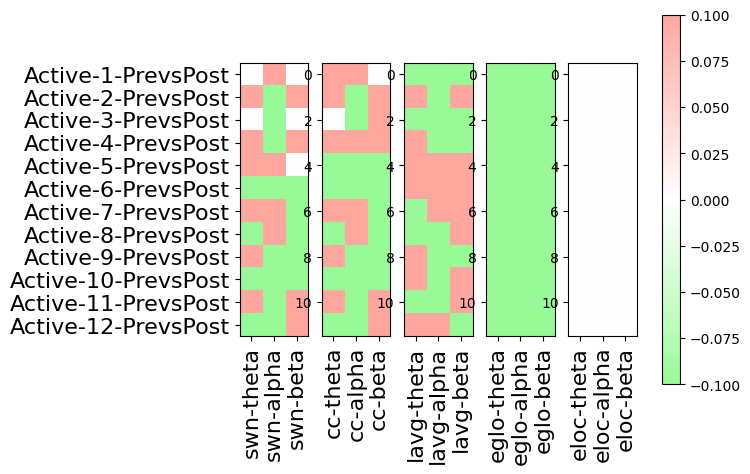

In [59]:
existing_file = f"comparison-results/result-active-latest.xlsx"
df = pd.read_excel(existing_file, header=[0,1])

df_without_rows = df.drop(df.index[0:len(df)//2])
df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2], axis=1)
df = df_without_columns
print("DF", df)

colors = [(0.596, 0.984, 0.596), (1,1,1), (1.000, 0.655, 0.625)] # white, green, blue (0.725, 0.855, 1.000),, red
values = [0,1,2]
cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, N=256)

condition_matrix = np.zeros((len(df), (len(df.columns)-N-1) // 2)) # 12 X 15
for j in range(len(df)): # rows
    insignificant_bands  = []
    for i in range(1, len(df.columns)-N, 2): # cols  
        # SWN  
        if i in range(1,6):
            if (df.iloc[j, i] == df.iloc[j, i+1] and df.iloc[j,i] == 0.0): # Disconnected graphs or incomparable graphs
                condition_matrix[j, i // 2] = 1 # white
                df.iloc[j, i]=None
                df.iloc[j, i+1]=None
            elif df.iloc[j, i] > df.iloc[j, i+1]: # pre swn > post swn
                condition_matrix[j, i // 2] = 2 # red
            else: # post swn >= pre swn
                condition_matrix[j, i // 2] = 0 # green

        # CC
        elif i in range(6, 12):
            if df.iloc[j, i] < df.iloc[j, i+1]: 
                condition_matrix[j, i//2] = 0 # green
            elif df.iloc[j, i] > df.iloc[j, i+1]:
                condition_matrix[j, i//2] = 2 # red
            else: 
                condition_matrix[j, i//2] = 1 # white
        
        # Lavg
        elif i in range(12, 18):
            if df.iloc[j, i] > df.iloc[j, i+1]: 
                condition_matrix[j, i//2] = 0 # green
            elif df.iloc[j, i] < df.iloc[j, i+1]:
                condition_matrix[j, i//2] = 2 # red
            else: 
                condition_matrix[j, i//2] = 1 # white


lis = [f"{df.columns[i][0]}-{df.columns[i][1].split('-')[0]}" for i in range(1, len(df.columns)-N-1, 2)]
y_list = [f"{elem.split('-')[0]}-{i+1}-{elem.split('-')[-1]}" for i, elem in enumerate(list(df.iloc[:, 0]))]

def sub_lists(lst):
    n = len(lst)
    size = len(mapping)
    return [lst[i*size:(i+1)*size] for i in range(5)]

sub_list = sub_lists(lis)
divided_matrix = np.hsplit(condition_matrix, 5)
print(condition_matrix, divided_matrix, sub_list)

f, axarr = plt.subplots(1,5) 
for count in range(5):
    # plt.figure(figsize=(8, 6))
    print("@@@@@@@@@@@@@@@", sub_list, range(((len(df.columns)-N-1)// 2)//3))
    im = axarr[count].imshow(divided_matrix[count], cmap=cmap)
    axarr[count].set_xticks(range(((len(df.columns)-N-1)// 2)//5), sub_list[count], rotation='vertical', fontsize=16)
axarr[0].set_yticks(range(len(df)), y_list, fontsize=16)
f.colorbar(im, ax=axarr.ravel().tolist())
plt.show()

In [ ]:
# existing_file = f"comparison-results/result-Active.xlsx"
# df = pd.read_excel(existing_file, header=[0,1])
# df_without_rows = df.drop(df.index[0:len(df)//2+1])
# df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2+1], axis=1)
# active_data = df_without_columns
# existing_file = f"comparison-results/result-Sham.xlsx"
# df = pd.read_excel(existing_file)
# df_without_rows = df.drop(df.index[0:len(df)//2+1])
# df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2+1], axis=1)
# sham_data = df_without_columns

# combined_data = pd.concat([active_data, sham_data], axis=0)


# # Add the new row to the DataFrame
# for index, row in active_data.iterrows():
#     # print(f"Row {index}:\n{row}\n")
#     print(len(active_data))
#     active_data.loc[len(active_data)] = row

# print(active_data)

# Assuming 'combined_data' is your DataFrame
# print(tabulate(combined_data, headers='keys', tablefmt='psql'))


# # Create a DataFrame with your data
# data = {
#     'group': ['active']*12 + ['placebo']*6,
#     'small_worldedness': [1.2, 1.3, 1.4, 1.1, 1.5, 1.6, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3],
#     'num_links': [100, 110, 95, 105, 115, 90, 100, 110, 95, 105, 100, 110, 95, 105, 100, 110, 95, 105, 100, 110],
#     'asymmetry': [0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2],
#     'brain_region': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B']
# }
# df = pd.DataFrame(data)

# # Fit a linear regression model
# model = smf.ols(formula='small_worldedness ~ group + num_links + asymmetry + brain_region', data=df)
# results = model.fit()

# # Print the regression results
# print(results.summary())


# Assuming you have loaded the data into DataFrames active_data and sham_data

# Combine the data into a single DataFrame

# # Assume 'SWI' is the dependent variable and 'freq_band_1_g1' and 'freq_band_1_g2' are independent variables
# X = combined_data[['freq_band_1_g1', 'freq_band_1_g2']]
# X = sm.add_constant(X)  # Add a constant term to the independent variables
# y = combined_data['SWI']

# # Fit the linear regression model
# model = sm.OLS(y, X).fit()

# # Print the model summary
# print(model.summary())


In [60]:
swn_values1, swn_values2 = {'theta' : [], 'alpha': [], 'beta': []} , {'theta' : [], 'alpha': [], 'beta': []}
cc_values1, cc_values2 = {'theta' : [], 'alpha': [], 'beta': []}, {'theta' : [], 'alpha': [], 'beta': []}
lavg_values1, lavg_values2 = {'theta' : [], 'alpha': [], 'beta': []}, {'theta' : [], 'alpha': [], 'beta': []}
# hub_values1, hub_values2 = {'theta' : [], 'alpha': [], 'beta': []}, {'theta' : [], 'alpha': [], 'beta': []}

master_dict = {'swn_values': [swn_values1, swn_values2], 'cc_values': [cc_values1, cc_values2], 'lavg_values': [lavg_values1, lavg_values2] }

for j in range(len(df)): # rows
    for k in range(1, len(df.columns)-N-1, 2): # cols 
        if k in range(1,6):
            para = 'swn_values'
        elif k in range(6, 12):
            para = 'cc_values'
        elif k in range(12, 18):
            para = 'lavg_values'
        else:
            continue

        if k%6 == 1:
            master_dict[para][0]['theta'].append(df.iloc[j, k])
            master_dict[para][1]['theta'].append(df.iloc[j, k+1])
        elif k%6 == 3:
            master_dict[para][0]['alpha'].append(df.iloc[j, k])
            master_dict[para][1]['alpha'].append(df.iloc[j, k+1])
        elif k%6 == 5:
            master_dict[para][0]['beta'].append(df.iloc[j, k])
            master_dict[para][1]['beta'].append(df.iloc[j, k+1])

        # for k in range(len(df.columns)-6, len(df.columns)-3, 1): #cols
        #     print(k, "&&&&&&&")
        #     print(len(ast.literal_eval(df.iloc[j, k])))

In [61]:
len(master_dict['lavg_values'][1]['beta'])

12

&&&&&&&&&&&
&&&&&&&&&&&
&&&&&&&&&&&


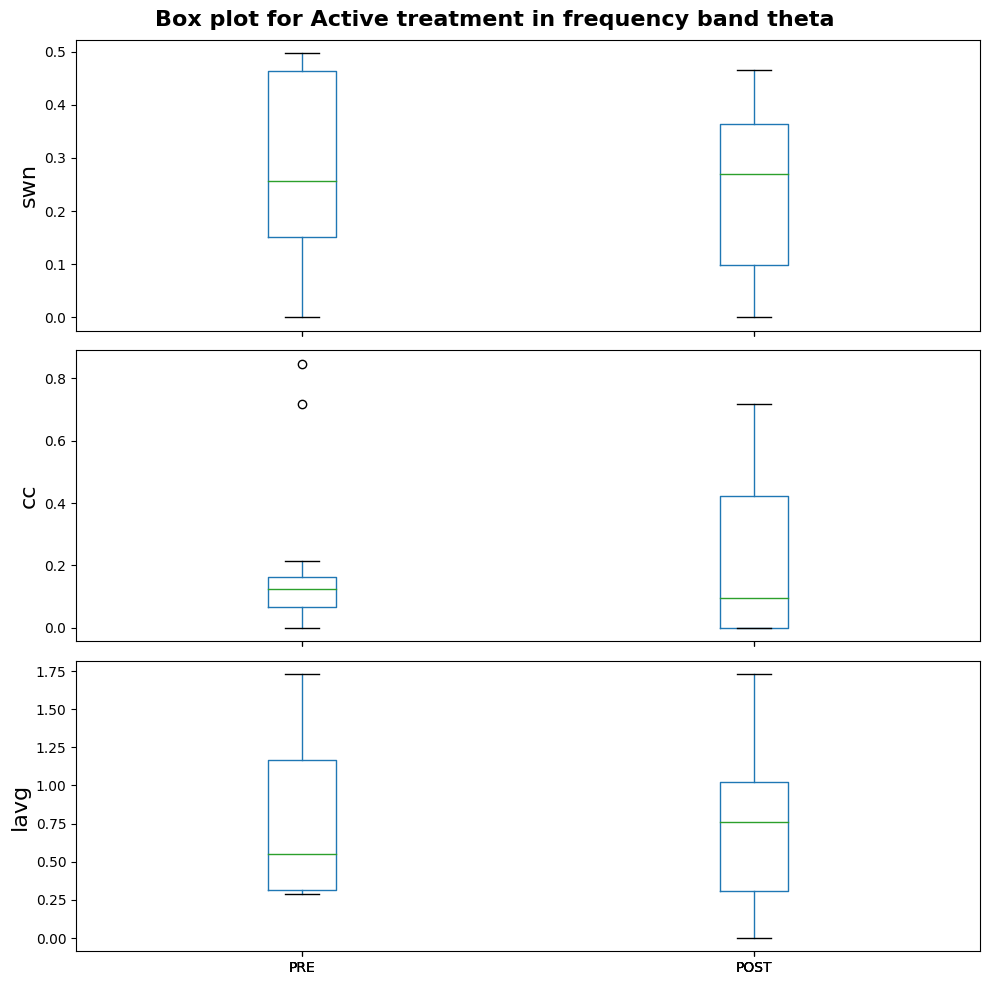

swn, p-value: 0.625
cc, p-value: 1.0
lavg, p-value: 1.0
&&&&&&&&&&&
&&&&&&&&&&&
&&&&&&&&&&&


/home/vishwani/.local/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


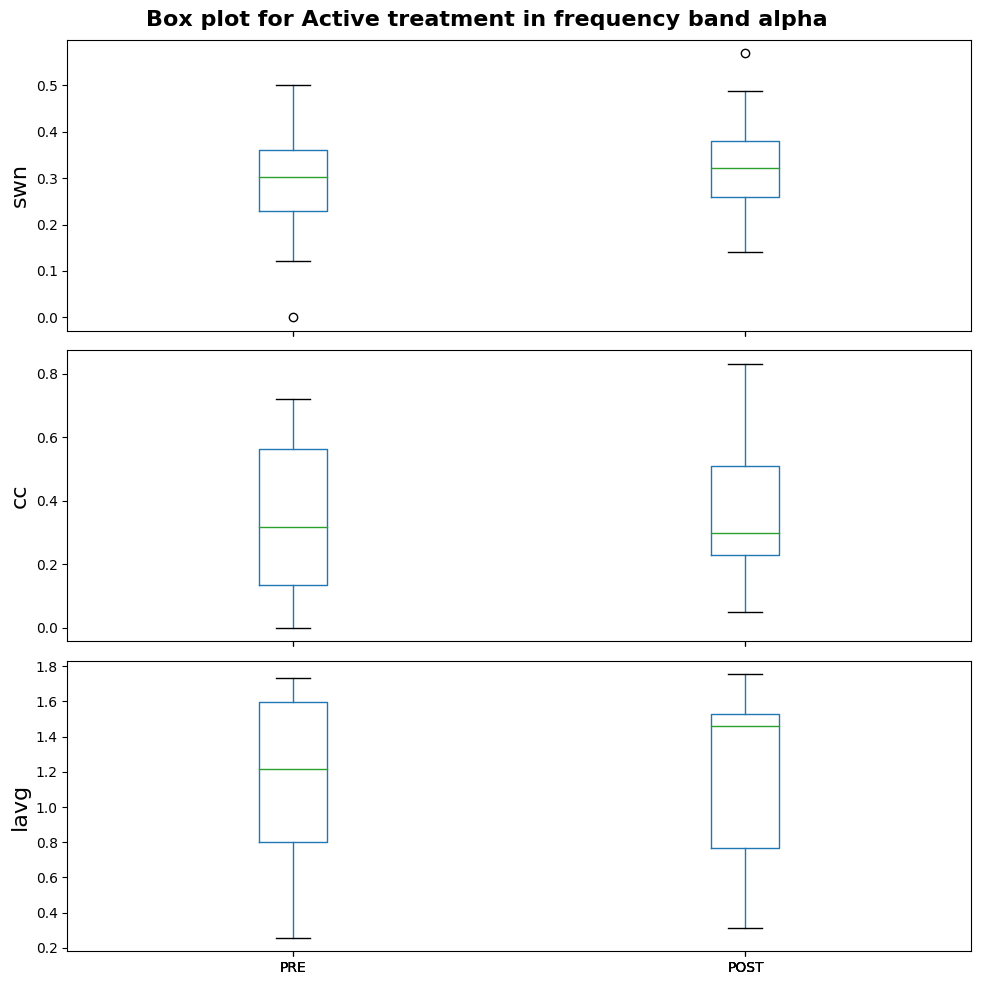

swn, p-value: 0.423828125
cc, p-value: 0.67724609375
lavg, p-value: 0.7333984375
&&&&&&&&&&&
&&&&&&&&&&&
&&&&&&&&&&&


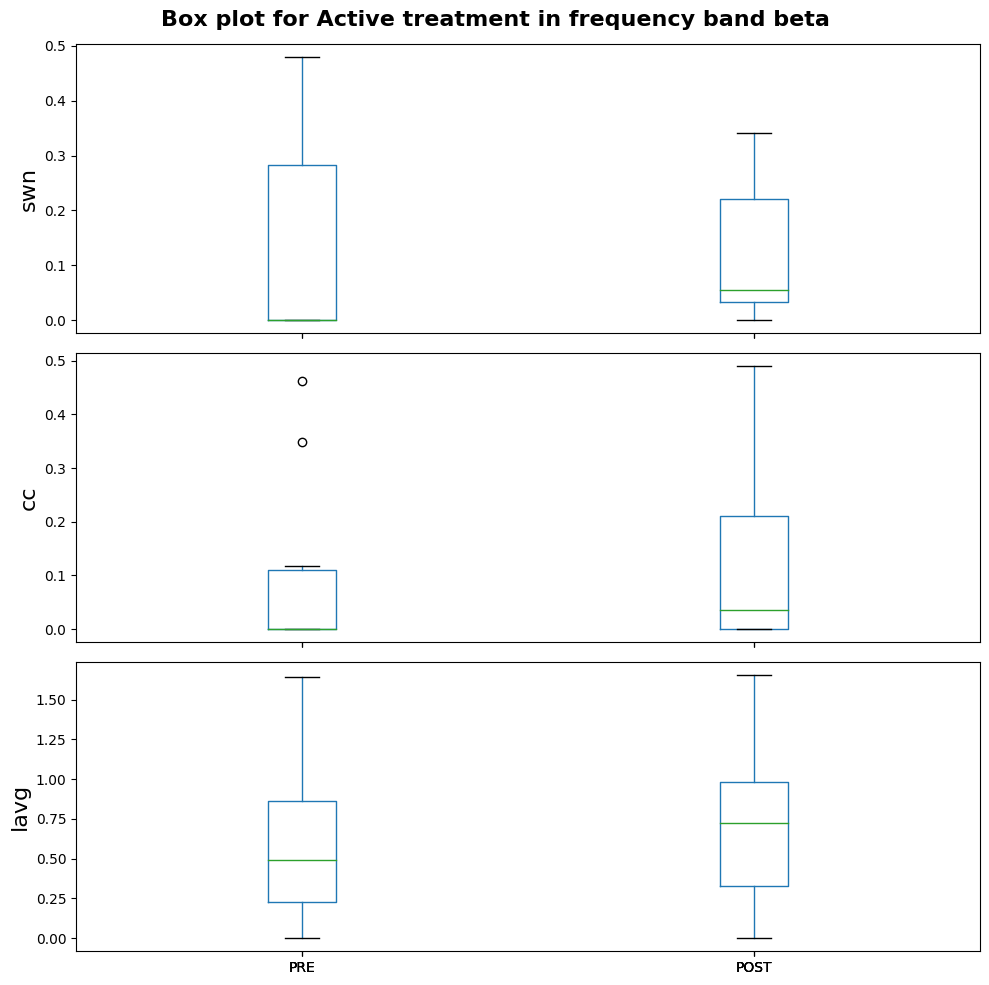

swn, p-value: 0.734375
cc, p-value: 0.789675102094056
lavg, p-value: 0.6220703125


/home/vishwani/.local/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [62]:
for map in mapping: 
    g1_group_measures = pd.DataFrame({
        # master_dict['swn_values'][0][mapping[map]] can be replaced with swn_values1[mapping[map]]
        'swn': master_dict['swn_values'][0][mapping[map]],
        'cc':   master_dict['cc_values'][0][mapping[map]],
        'lavg': master_dict['lavg_values'][0][mapping[map]],
    })


    g2_group_measures = pd.DataFrame({
        'swn': master_dict['swn_values'][1][mapping[map]],
        'cc': master_dict['cc_values'][1][mapping[map]],
        'lavg': master_dict['lavg_values'][1][mapping[map]],
    })

    fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    parameters = ['swn', 'cc', 'lavg']

    for i, param in enumerate(parameters):
        x = pd.DataFrame({GROUP1: g1_group_measures[param], GROUP2: g2_group_measures[param]})
        x.boxplot(ax=axes[i], grid=False)
        print("&&&&&&&&&&&", )
        # axes[i].boxplot([g1_group_measures[param], g2_group_measures[param]], labels=[GROUP1, GROUP2])
        axes[i].set_ylabel(param, fontsize=16)


    fig.suptitle(f'Box plot for {ACTIVE_SHAM} treatment in frequency band {mapping[map]}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Perform t-test for each parameter
    for param in parameters:
        # print("*********", g1_group_measures[param], g2_group_measures[param])
        t_stat, p_value = wilcoxon(g1_group_measures[param].dropna(), g2_group_measures[param].dropna())
        print(f"{param}, p-value: {p_value}")
        if p_value < 0.1:
            print(f"Significant difference for parameter: {param} for freq band: {mapping[map]}")

In [64]:
# all_list = []
# items = []
# for i in df[('regions', 'theta')]:
#     y = i.replace('[', '').replace(']', '').replace("\'", '')
#     if len(y):
#         items.append(y.split(", "))
#         for _ in y.split(", "):
#             all_list.append(_)
#     else:
#         items.append([])
# region_score = {key: [] for key in all_list}
# region_score

In [ ]:
# pre_values = df[('swn', 'theta-g1')].to_list()
# post_values = df[('swn', 'theta-g2')].to_list()

# for item, pre, post in zip(items, pre_values, post_values):
#     for _ in item:
#         region_score[_].append(post-pre)


# for k, v in region_score.items():
#     region_score[k] = sum(v)
# print(region_score)

In [ ]:
# median_value = np.median(list(region_score.values()))
# above_median_values = [value for value in region_score.values() if value > median_value]
# std_above_median = np.std(above_median_values)

# threshold = median_value + std_above_median

# significant_regions = [region for region, value in region_score.items() if value >= threshold]

# print("Threshold:", threshold)
# print("Statistically significant regions:")
# for region in significant_regions:
#     print(region, region_score[region])

In [ ]:
# import numpy as np
# from mayavi import mlab
# import networkx as nx

# # Define the binarized connectivity matrix
# connectivity_matrix = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
#                                 [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
#                                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# # Create a graph
# G = nx.Graph()

# # Add edges for non-zero entries in the connectivity matrix
# for i in range(connectivity_matrix.shape[0]):
#     for j in range(connectivity_matrix.shape[1]):
#         if connectivity_matrix[i, j] == 1:
#             G.add_edge(i, j)

# # Visualize using Mayavi
# mlab.figure(size=(800, 800))

# # Add the brain surface
# brain = mlab.pipeline.surface(mlab.pipeline.open('brain.obj'))
# brain.actor.property.opacity = 0.2

# # Add the nodes
# nodes = mlab.points3d(range(connectivity_matrix.shape[0]), 
#                       range(connectivity_matrix.shape[0]), 
#                       range(connectivity_matrix.shape[0]),
#                       scale_factor=0.5)

# # Add the edges
# for edge in G.edges():
#     src, tgt = edge
#     x = [src, tgt]
#     y = [src, tgt]
#     z = [src, tgt]
#     mlab.plot3d(x, y, z, tube_radius=0.05, color=(1, 0, 0))

# mlab.show()